In [ ]:
# 1. Le code fourni : fonction mesurer_temps

In [1]:
import time
import numpy as np
#------------------------------------------------
# Fonction pour mesurer un temps d'exécution
#------------------------------------------------
def mesurer_temps(fonction, *args, n_repetitions=7):
# Appelle plusieurs fois `fonction(*args)` et renvoie la médiane des temps d'exécution. 
    temps = []
    for _ in range(n_repetitions):
        debut = time.perf_counter()
        fonction(*args)
        fin = time.perf_counter()
        temps.append(fin- debut)
    temps_triees = sorted(temps)
    return temps_triees[len(temps)//2]

In [ ]:
"""
Commentaires :
 perf_counter() donne le chronomètre le plus précis en Python.
 La fonction testée est appelée plusieurs fois pour lisser les uctuations.
 On utilise sorted() pour trier les durées.
 L'expression len(temps)//2 sélectionne l'élément central : la médiane.
 Le résultat est un temps caractéristique pour cette fonction et ces données.
"""

In [ ]:
# 2. Fonctions de calcul à comparer

In [2]:
#------------------------------------------------
# Fonctions de calcul à comparer
#------------------------------------------------
def somme_numpy(tab):
    return np.sum(tab)
    
def somme_listes(liste_2d):
    total = 0
    for ligne in liste_2d:
        for x in ligne:
            total += x
    return total

In [ ]:
# Exercice 1) Comprendre et interpréter les mesures

In [5]:
# Exercice 2) Comparaison de premières opérations

n_lignes = 2000
n_colonnes = 200
liste_2d = [[i + j for j in range(n_colonnes)] for i in range(n_lignes)]
tab_numpy = np.array(liste_2d)

In [6]:
# 1°
# Mesures des temps
tmps_listes = mesurer_temps(somme_listes, liste_2d)
tmps_numpy = mesurer_temps(somme_numpy, tab_numpy)

print("Temps médian listes :", tmps_listes)
print("Temps médian nnumpy :", tmps_numpy)
print("Rapport (listes/numpy) :", int(tmps_listes/tmps_numpy))


Temps médian listes : 0.10839800001122057
Temps médian nnumpy : 0.0006829999620094895
Rapport (listes/numpy) : 158


In [ ]:
# 2°
# La différence en temps de calcul est surement dû à la double boucle dans la fonction somme_listes

In [ ]:
# Exercice 3) Produit élément par élément

In [7]:
def produit_element_par_element_listes(A, B):

 # Renvoie une matrice C[i][j] = A[i][j] * B[i][j], ou A et B sont des listes de listes de meme taille.

    C = []
    for i in range(len(A)):
        ligne = []
        for j in range(len(A[0])):
            ligne.append(A[i][j]*B[i][j])
        C.append(ligne)
    return C

def prod_numpy(A, B):
    return A*B

In [8]:
# Mesures des temps
tmps_listes = mesurer_temps(produit_element_par_element_listes, liste_2d, liste_2d)
tmps_numpy = mesurer_temps(prod_numpy, tab_numpy, tab_numpy)

print("Temps médian listes :", tmps_listes)
print("Temps médian nnumpy :", tmps_numpy)
print("Rapport (listes/numpy) :", int(tmps_listes/tmps_numpy))


Temps médian listes : 0.272687999997288
Temps médian nnumpy : 0.003522200044244528
Rapport (listes/numpy) : 77


In [ ]:
# 3° 
# NumPy est encore plus rapide toutjours à cause de la double boucle

In [ ]:
# Exercice 4) Multiplication matricielle

In [35]:
def multiplication_matricielle_listes(A, B):
    """
    A : matrice n x p
    B : matrice p x m
    Renvoie C : matrice n x m correspondant au produit matriciel.
    """

    n = len(A)
    p = len(A[0])
    m = len(B[0])

    # Initialisation matrice C remplie de zéros
    C = []

    for i in range(n):
        C1 = []
        for j in range(m):
            compteur = 0
            for k in range(p):
                compteur += A[i][k] * B[k][j]
            C1.append(compteur)
        C.append(C1)
    return C

In [38]:
L1 = [[1, 0],[1, 1]]
multiplication_matricielle_listes(L1, L1)

[[1, 0], [2, 1]]

In [15]:
def multiplication_matricielle_numpy(A, B):
    return A @ B

In [42]:
# Echantillon 
n_lignes1 = 100
n_colonnes1 = 100
liste_2d1 = [[i + j for j in range(n_colonnes1)] for i in range(n_lignes1)]
tab_numpy1 = np.array(liste_2d1)

# Mesures des temps
tmps_listes = mesurer_temps(multiplication_matricielle_listes, liste_2d1, liste_2d1)
tmps_numpy = mesurer_temps(multiplication_matricielle_numpy, tab_numpy1, tab_numpy1)

print("Temps médian listes :", tmps_listes)
print("Temps médian nnumpy :", tmps_numpy)
print("Rapport (listes/numpy) :", tmps_listes/tmps_numpy)

Temps médian listes : 0.7314520999789238
Temps médian nnumpy : 0.004730199929326773
Rapport (listes/numpy) : 154.63449979016593


In [ ]:
# 4°
"""
Le produit matriciel codé en listes Python fonctionne mais devient très rapidement trop lent, car Python exécute trois boucles imbriquées, avec des accès coûteux à des objets en mémoire.
NumPy, au contraire, utilise des structures en mémoire optimisées et des bibliothèques compilées en C, ce qui lui permet d’effectuer les calculs matriciels des dizaines à des milliers de fois plus vite.

Lorsque la taille des matrices augmente, la complexité en O(n^3)rend les boucles Python totalement inefficaces, tandis que NumPy reste performant grâce à l’optimisation bas niveau.

Pour tout calcul matriciel sérieux, NumPy est indispensable.
"""

In [ ]:
# Exercice 5 (optionnel) Étude de l'évolution des temps selon la taille

In [50]:
# Echantillon
n_lignes = [50, 100, 150, 200, 300]
n_colonnes = [50, 100, 150, 200, 300]

liste_2d0 = [[i + j for j in range(n_colonnes[0])] for i in range(n_lignes[0])]
tab_numpy0 = np.array(liste_2d0)

liste_2d1 = [[i + j for j in range(n_colonnes[1])] for i in range(n_lignes[1])]
tab_numpy1 = np.array(liste_2d1)

liste_2d2 = [[i + j for j in range(n_colonnes[2])] for i in range(n_lignes[2])]
tab_numpy2 = np.array(liste_2d2)

liste_2d3 = [[i + j for j in range(n_colonnes[3])] for i in range(n_lignes[3])]
tab_numpy3 = np.array(liste_2d3)

liste_2d4 = [[i + j for j in range(n_colonnes[4])] for i in range(n_lignes[4])]
tab_numpy4 = np.array(liste_2d4)

# Mesures des temps
tmps_listes0 = mesurer_temps(multiplication_matricielle_listes, liste_2d0, liste_2d0)
tmps_numpy0 = mesurer_temps(multiplication_matricielle_numpy, tab_numpy0, tab_numpy0)

tmps_listes1 = mesurer_temps(multiplication_matricielle_listes, liste_2d1, liste_2d1)
tmps_numpy1 = mesurer_temps(multiplication_matricielle_numpy, tab_numpy1, tab_numpy1)

tmps_listes2 = mesurer_temps(multiplication_matricielle_listes, liste_2d2, liste_2d2)
tmps_numpy2 = mesurer_temps(multiplication_matricielle_numpy, tab_numpy2, tab_numpy2)

tmps_listes3 = mesurer_temps(multiplication_matricielle_listes, liste_2d3, liste_2d3)
tmps_numpy3 = mesurer_temps(multiplication_matricielle_numpy, tab_numpy3, tab_numpy3)

tmps_listes4 = mesurer_temps(multiplication_matricielle_listes, liste_2d4, liste_2d4)
tmps_numpy4 = mesurer_temps(multiplication_matricielle_numpy, tab_numpy4, tab_numpy4)

print(f"Taille : {n_lignes[0]} --> Python = {tmps_listes0} s NumPy = {tmps_numpy0} s")
print(f"Taille : {n_lignes[1]} --> Python = {tmps_listes1} s NumPy = {tmps_numpy1} s")
print(f"Taille : {n_lignes[2]} --> Python = {tmps_listes2} s NumPy = {tmps_numpy2} s")
print(f"Taille : {n_lignes[3]} --> Python = {tmps_listes3} s NumPy = {tmps_numpy3} s")
print(f"Taille : {n_lignes[4]} --> Python = {tmps_listes4} s NumPy = {tmps_numpy4} s")

Taille : 50 --> Python = 0.0856035000178963 s NumPy = 0.0010965000838041306 s
Taille : 100 --> Python = 0.6327738999389112 s NumPy = 0.004858600092120469 s
Taille : 150 --> Python = 2.66127719997894 s NumPy = 0.01576570002362132 s
Taille : 200 --> Python = 6.375002900022082 s NumPy = 0.04567789996508509 s
Taille : 300 --> Python = 22.45955129992217 s NumPy = 0.12038889992982149 s


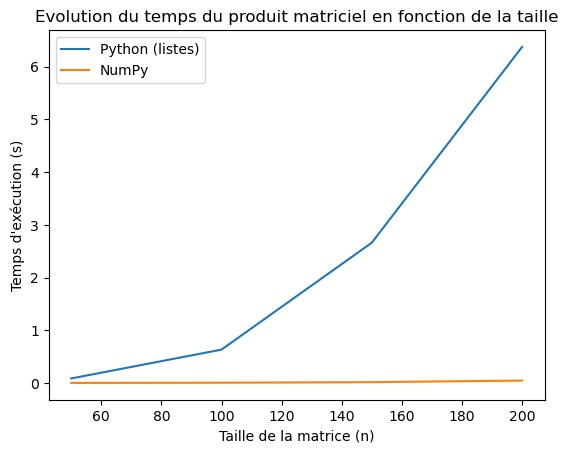

In [53]:
import matplotlib.pyplot as plt

tailles = [50, 100, 150, 200]
temps_python = [0.0856035000178963, 0.6327738999389112, 2.66127719997894, 6.375002900022082] # valeurs trouvées
temps_numpy = [0.0010965000838041306, 0.004858600092120469, 0.01576570002362132, 0.04567789996508509]
plt.figure()
plt.plot(tailles, temps_python, label="Python (listes)")
plt.plot(tailles, temps_numpy, label="NumPy")
plt.xlabel("Taille de la matrice (n)")
plt.ylabel("Temps d'exécution (s)")
plt.legend()
plt.title("Evolution du temps du produit matriciel en fonction de la taille")
plt.show()